# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Adel Parvizi
2.   Student Number: 400206602


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change the address as you wish
plays = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/HW1/data/user_artists.dat', sep='\t')
artists = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/HW1/data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [4]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################
# name = []
# for i in plays.artistID:
#   name.append(artists[artists.id == i].iloc[0]["name"])
# ap = pd.DataFrame({"id":plays.artistID, "name":name, "userID":plays.userID, "artistID": plays.artistID, "weight": plays.weight}, index=range(0, 92834))         ##
# ap = ap.sort_values('id', ascending='False')
ap = pd.merge(left=artists, right=plays, left_on='id', right_on='artistID')

In [5]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [6]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})
ap

,id,name,userID,artistID,playCount
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [7]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

# ap.drop('id', inplace=True, axis=1)
ap.pop("id")
ap = ap.reset_index(drop=True)
ap

,name,userID,artistID,playCount
0,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
2,MALICE MIZER,785,1,76
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
...,...,...,...,...
92829,Diamanda Galás,454,18741,301
92830,Aya RL,454,18742,294
92831,Coptic Rain,454,18743,287
92832,Oz Alchemist,454,18744,286


In [8]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


set_name = set(ap.name)
totalUniqueUsers=[]
totalArtistPlays=[]
for nm in set_name:
    totalUniqueUsers.append(len(set(ap[ap.name == nm].userID)))
    totalArtistPlays.append(ap[ap.name == nm].playCount.sum())
artist_rank = pd.DataFrame({"name":list(set_name), "totalUniqueUsers":totalUniqueUsers, "totalArtistPlays":totalArtistPlays})
artist_rank = artist_rank.sort_values(by='totalArtistPlays', ascending=False)
artist_rank['avgUserPlays'] =  artist_rank["totalArtistPlays"]/artist_rank["totalUniqueUsers"]

In [9]:
artist_rank

,name,totalUniqueUsers,totalArtistPlays,avgUserPlays
1321,Britney Spears,522,2393140,4584.559387
16716,Depeche Mode,282,1301308,4614.567376
11406,Lady Gaga,611,1291387,2113.563011
14141,Christina Aguilera,407,1058405,2600.503686
7560,Paramore,399,963449,2414.659148
...,...,...,...,...
1973,Rodrigo e Rogério,1,1,1.000000
6575,Tami Chynn,1,1,1.000000
16324,Heart of space,1,1,1.000000
13558,Rodrigo e Rogerio,1,1,1.000000


In [10]:
artist_rank = artist_rank.reset_index(drop=True)
artist_rank

,name,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,Britney Spears,522,2393140,4584.559387
1,Depeche Mode,282,1301308,4614.567376
2,Lady Gaga,611,1291387,2113.563011
3,Christina Aguilera,407,1058405,2600.503686
4,Paramore,399,963449,2414.659148
...,...,...,...,...
17627,Rodrigo e Rogério,1,1,1.000000
17628,Tami Chynn,1,1,1.000000
17629,Heart of space,1,1,1.000000
17630,Rodrigo e Rogerio,1,1,1.000000


In [11]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it
###############################################################################
ap = pd.merge(left=ap, right=artist_rank, left_on='name', right_on='name')
# totalUniqueUsers, totalArtistPlays, avgUserPlays = [], [], []
# for nm in ap.name:
#   totalUniqueUsers.append(artist_rank[artist_rank.name == nm].iloc[0].totalUniqueUsers)
#   totalArtistPlays.append(artist_rank[artist_rank.name == nm].iloc[0].totalArtistPlays)
#   avgUserPlays.append(artist_rank[artist_rank.name == nm].iloc[0].avgUserPlays)
# ap["totalUniqueUsers"] = totalUniqueUsers
# ap["totalArtistPlays"] = totalArtistPlays
# ap = pd.DataFrame({"id":ap.artistID, "name":ap.name,"userID":ap.userID,"artistID":ap.artistID,"playCount":ap.playCount, "totalUniqueUsers":totalUniqueUsers, "totalArtistPlays":totalArtistPlays, "avgUserPlays":avgUserPlays})

In [12]:
ap.head(20)

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,MALICE MIZER,34,1,212,3,771,257.000000
1,MALICE MIZER,274,1,483,3,771,257.000000
2,MALICE MIZER,785,1,76,3,771,257.000000
3,Diary of Dreams,135,2,1021,12,8012,667.666667
4,Diary of Dreams,257,2,152,12,8012,667.666667
5,Diary of Dreams,325,2,3466,12,8012,667.666667
6,Diary of Dreams,397,2,56,12,8012,667.666667
7,Diary of Dreams,560,2,134,12,8012,667.666667
8,Diary of Dreams,580,2,803,12,8012,667.666667
9,Diary of Dreams,935,2,428,12,8012,667.666667


# Exploration

In [13]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


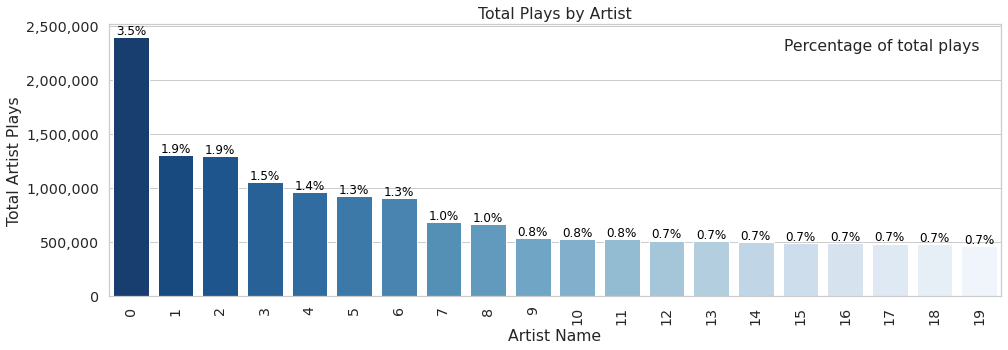

In [14]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


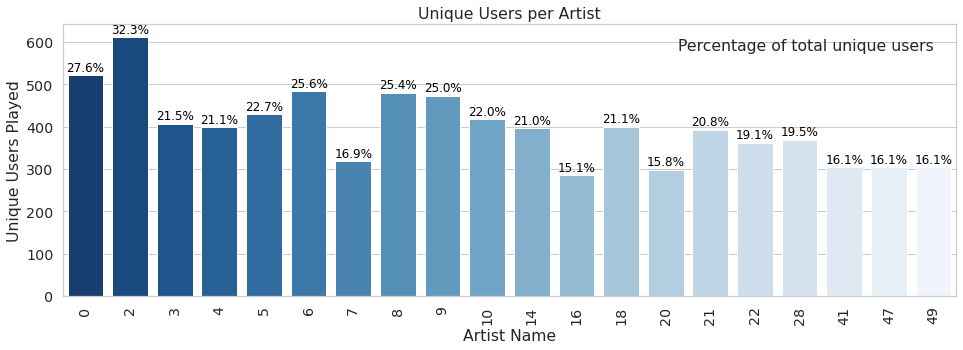

In [15]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


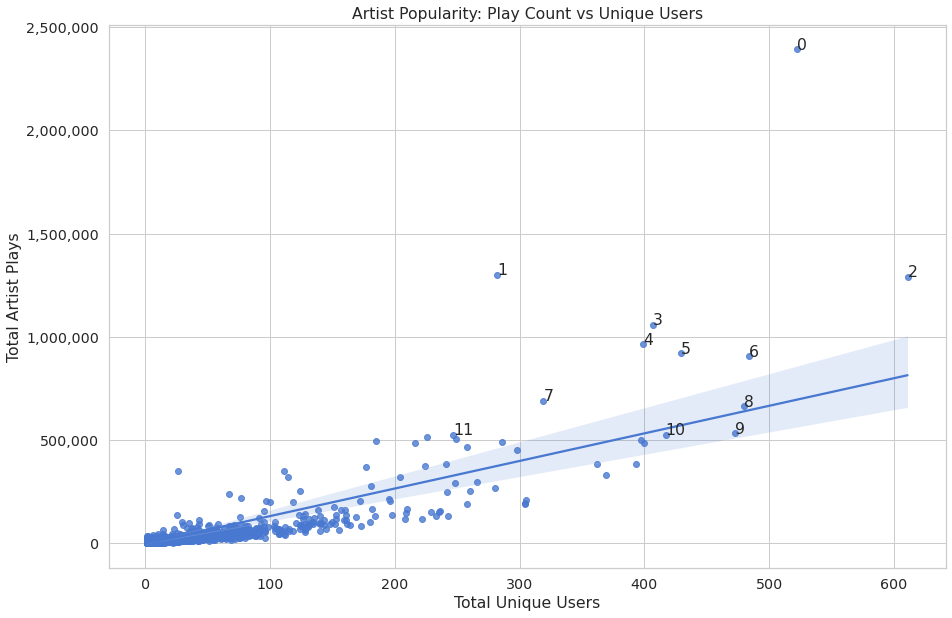

In [16]:
AP = ap.sort_values('totalArtistPlays', ascending='False')
top_artists = AP.index
top_artists =  artist_rank.sort_values(['totalArtistPlays'],ascending=False).head(12).index

x = artist_rank.totalUniqueUsers# TODO : "totalUniqueUsers" of "artist_rank"
y =  artist_rank.totalArtistPlays# TODO :  "totalArtistPlays" of "artist_rank"
labels =  artist_rank.index# TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [17]:
pc = ap.playCount
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)
ap

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
0,MALICE MIZER,34,1,212,3,771,257.000000,0.000598
1,MALICE MIZER,274,1,483,3,771,257.000000,0.001367
2,MALICE MIZER,785,1,76,3,771,257.000000,0.000213
3,Diary of Dreams,135,2,1021,12,8012,667.666667,0.002892
4,Diary of Dreams,257,2,152,12,8012,667.666667,0.000428
...,...,...,...,...,...,...,...,...
92829,Diamanda Galás,454,18741,301,1,301,301.000000,0.000851
92830,Aya RL,454,18742,294,1,294,294.000000,0.000831
92831,Coptic Rain,454,18743,287,1,287,287.000000,0.000811
92832,Oz Alchemist,454,18744,286,1,286,286.000000,0.000808


In [18]:
# import pandas as pd
# ratings_df = pd.DataFrame(data=None, index=list(set((ap.userID))), columns=list(set((ap.artistID))))


# for i in list(set((ap.userID))):
#   for j in list(set((ap.artistID))):
#     xyz = ap[ap.artistID == i]
#     xyzw = xyz[xyz.userID == j]
#     if len(xyzw.index) is not 0:
#       ratings_df[j][i] = xyzw.iloc[0].playCountScaled

In [19]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################
ratings_df = pd.DataFrame(data=None, index=list(set((ap.userID))), columns=list(set((ap.artistID))))
for i in list(ap.index):
  ratings_df[ap.iloc[i].artistID][ap.iloc[i].userID] = ap.iloc[i].playCountScaled

In [20]:
ratings_df

,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings = ratings_df.fillna(0)
ratings = ratings.to_numpy()


In [22]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code

print(len(np.nonzero(ratings)[0])/(ratings.shape[0]*ratings.shape[1])*100)
## END

0.2763750225421394


# Fitting(Training) Model (50pts)

In [26]:
ratings.shape

(1892, 17632)

In [ ]:
ratings.max()

1.0

In [ ]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    
    train = np.zeros(ratings.shape)
    validation = np.zeros(ratings.shape)
    train[train >= MIN_USER_RATINGS] = 0
    validation[validation >= MIN_USER_RATINGS] = DELETE_RATING_COUNT
    return train, validation

In [ ]:
train, val = train_test_split(ratings)

In [ ]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):+
    prediction = # TODO
    ground_truth = # TODO
    return sqrt(mean_squared_error(prediction, ground_truth))

In [ ]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration
  return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index

In [ ]:
#creating recommender object
recommender = Recommender().fit(train, val)

In [ ]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################

#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [ ]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [ ]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [ ]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

In [ ]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**